# Context

This notebook presents some **Data Imputation Techniques** using the training dataset provided by the WIDS Datathon 2021. We already performed an exploratory data analysis in this data. If you haven't seen it, you can find it <a href="https://github.com/chainao/EDA-WiDS_Datathon_2021">here</a> (In the visualization, I applied some lessons I learned by reading the book  "**<a href="https://www.storytellingwithdata.com/books">Storytelling with Data</a>**" written by Cole Knaflic). 


Well, before exploring the data imputation techniques, I will briefly present the WiDS and the WiDS Datathon 2021. Let's go!?!

## What is WiDS?

<a href="https://www.widsconference.org/">WiDS (Women in Data Science)</a> is an initiative founded at Stanford in 2015 that aims to inspire and educate Data Sciences worldwide,  regardless of gender, and to support women in the field. 


## WiDS Datathon


In 2021, WiDS announced its fourth <a href="https://www.kaggle.com/c/widsdatathon2021">Datathon</a> focused on models to determine whether a patient admitted to an Intensive Care Unit (ICU) has been diagnosed with a particular type of diabetes, Diabetes Mellitus. 


#### Diabetes Mellitus

This is a metabolic disease characterized by elevated blood glucose levels (or blood sugar), which can occur when our body becomes resistant to insulin, or our pancreas produces little insulin. There are two types of diabetes [<a href="https://www.who.int/health-topics/diabetes#tab=tab_1"> REF </a>]. 

- Type 1 diabetes: occurs when our immune system attacks the beta cells. Consequently, they do not produce or produces a little insulin. So, the glucose stays in the blood instead of being used as energy. 
- Type 2 diabetes: occurs when the body becomes resistant to insulin or doesn't make enough insulin.


Some of the risk factors for diabetes are high blood pressure, weight, etc. And some of the consequences are renal and hepatic diseases.

# Quick EDA

Here, we performed a quick EDA, as said before, once we already dedicated a Notebook just to perform the EDA in this same dataset. You can access it  <a href="https://github.com/chainao/EDA-WiDS_Datathon_2021">here</a>. In this notebook, we focus on Data Imputation Techniques.

The datathon provided training and testing datasets. Here, we will explore the training one.

In [1]:
# # Importing the libraries

import warnings
import pandas as pd
import seaborn as sns
import utils as ul
import time
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
sns.set(style="white")
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [3]:
# Reading data

df = pd.read_csv('TrainingWiDS2021.csv', sep=",") # Training data

The dataset contains data from patients in the first 24 hours of intensive care.

Some of the information provided are gender, age, weight and height. Other features refer to the patient's origin and monitoring rates in the first 24 hours of intensive care (e.g., glucose_appache). The target feature is "diabetes_mellitus", which indicates whether the patient was diagnosed with diabetes mellitus or not.

The dataset is composed of **130.157 instances and 180 features**, including the target (diabetes_mellitus). See in table below!

In [4]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Data columns (total 181 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   130157 non-null  int64  
 1   encounter_id                 130157 non-null  int64  
 2   hospital_id                  130157 non-null  int64  
 3   age                          125169 non-null  float64
 4   bmi                          125667 non-null  float64
 5   elective_surgery             130157 non-null  int64  
 6   ethnicity                    128570 non-null  object 
 7   gender                       130091 non-null  object 
 8   height                       128080 non-null  float64
 9   hospital_admit_source        96959 non-null   object 
 10  icu_admit_source             129917 non-null  object 
 11  icu_id                       130157 non-null  int64  
 12  icu_stay_type                130157 non-null  object 
 13

157 variables are float, 18 are int and 6 are object (including diabetes_mellitus).

In [5]:
df.dtypes.value_counts()

float64    157
int64       18
object       6
dtype: int64

### Missing Data

A missing value is the part of the dataset that seems missing. It can occur due to problems in data collection, data corruption, or that information really does not exist. For example, that instance does not have that information in reality. Some of the ways missing data can be represented are: "N/A" and "NaN". Here, it is represented in this second way.

The dataset has more than 8 million missing values, as printed below.

In [6]:
df.isna().sum().sum()

8018193

The table below shows the first 5 instances of the base. We already can observe that there are some "NaN" (missing) values in some columns.

In [7]:
df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,1

In [47]:
print('The dataset has '+str(df.duplicated().sum())+ ' duplicates. So, we do need to treat this question.')

The dataset has 17824 duplicates. So, we do need to treat this question.


Now, let's check the percentage of missing data per column!

As we have features from three data types (float, object, and int), we will check the missing values per data column type.

#### object (categorical) features

The dataset has 6 categorical features (the ones shown below). The categorical feature with more missing data (26%) is  hospital_admit_source. In turn, icu_type and icu_stay_type have no missing data.

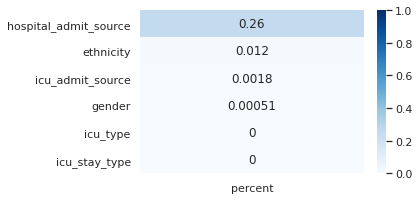

In [9]:
ul.heat_map_per_type(df, 'object', 3)

#### int features

None of the 18 int features has missing data, as shown in the heatmap below.

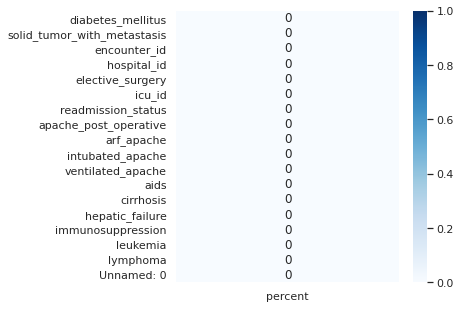

In [10]:
ul.heat_map_per_type(df, 'int', 5)

#### float features

As we have 157 float features, we plotted the percentages of missing data for these features in a bar plot for a quick visualization, as shown below. See that lots of features have more than 50% missing values.

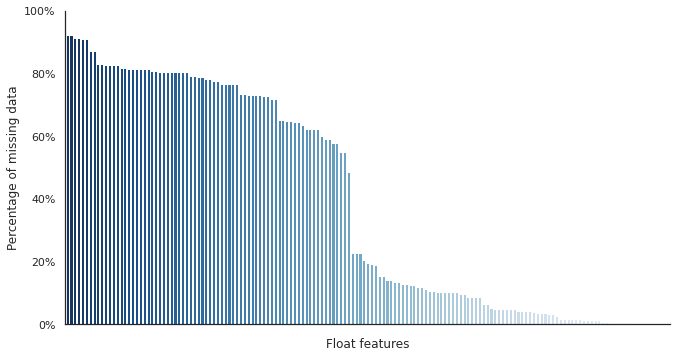

In [11]:
df_missing_float = df.select_dtypes(include='float')
df_missing_float = ul.counting_missing_values(df_missing_float)
ul.bar_plot(df_missing_float, 'index', 'percent', labels=["Float features", "Percentage of missing data"])

We also plotted the float features and their respective percentages of missing data in four heatmaps (see below). The features with the highest percentage of missing data are h1_bilirubin_max and h1_bilirubin_min, with 92% of missing values each. They represent the highest and lowest bilirubin concentration of the patient in their serum or plasma during the first hour of their unit stay.


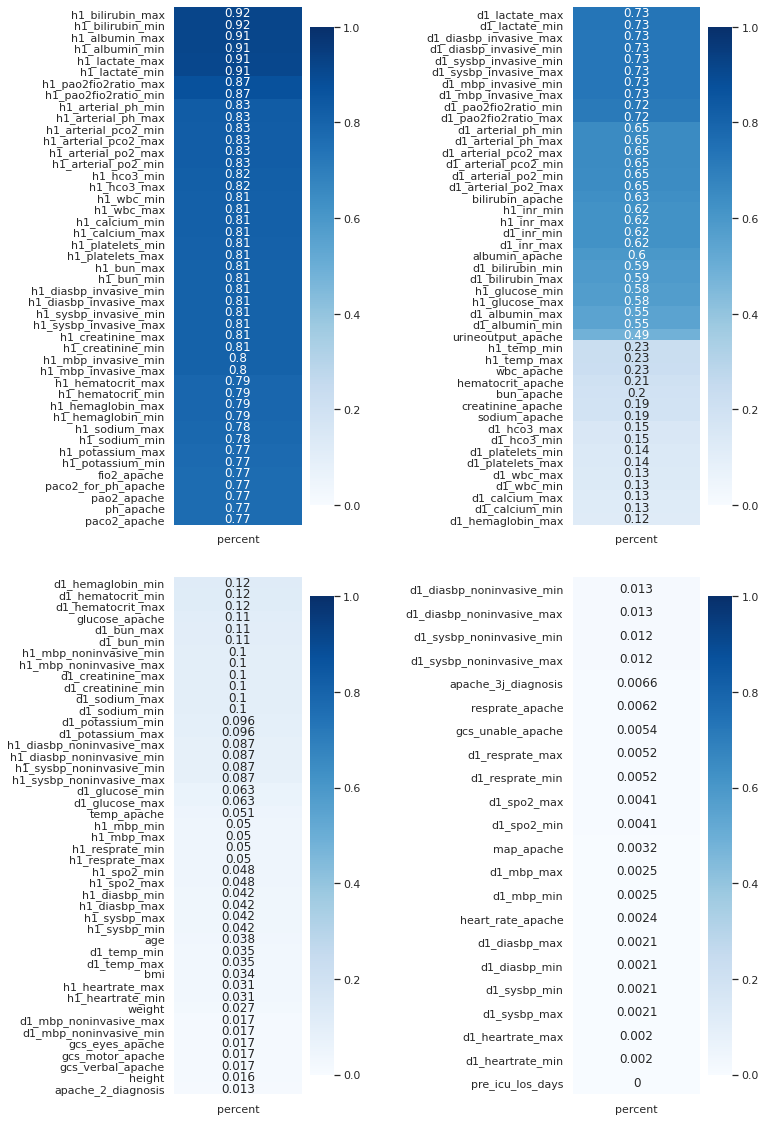

In [12]:
ul.mini_heatmaps(df_missing_float)

46% of the float features have more than 50% of missing data, as shown below.

In [13]:
df_missing_float = df.select_dtypes(include='float')
df_missing_float = ul.counting_missing_values(df_missing_float)
len(df_missing_float.loc[df_missing_float['percent'] > 0.5])/len(df_missing_float)

0.46496815286624205

Below we see the percentage of features with missing values in each percentage range. For instance, 35% of features have between 0% and 1% of missing values.

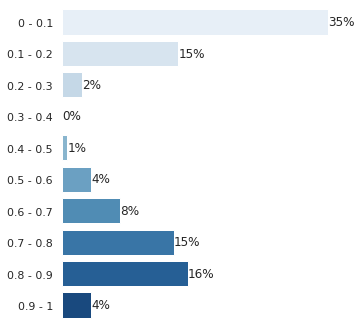

In [14]:
ul.horizontal_bar_plot(ul.divide_missing_by_range(df_missing_float))

# Data Imputation

Data imputation is an approach to handle missing data. It is the process of replacing the missing values with valid ones.

But why imputing missing data?

*Well, first of all, I want to make clear that each case is different. You have to study your data and see which path makes more sense to follow.*

- Depending on the algorithm you want to adopt, it supports or does not missing data. If it does, we are lucky and can skip the "data imputation" step. But, if it does not support, you have to perform that (*this is the first reason why imputing missing data*). 
- Maybe you thought, "*but if I remove the instances with missing data?*". Well, as I said before, each case is different, but not forget that data is important to our analysis and modeling. If, for instance, you are working in a small dataset, maybe removing instances with missing data may be not adequate because somehow you are losing information and your dataset will get even smaller. 
- If you are working in a large dataset and a lot of instances have missing information, deleting them also generates a similar problem, your dataset can get small because you deleted a lot of information. You also can think of deleting the feature that has many missing values. It is a question to be analyzed. However, you must lead with the missing data in the other features.


Convinced that missing data is an inevitable part of the process and sometimes we have to lead with that (e.g., because the algorithm we chose do not deal with that), we explored some data imputation techniques, investigating **how mean and standard deviation are affected by different techniques of data imputation**. 

We explore two types of data imputation, univariate and multivariate. You see some of these techniques below.

Before introducing the techniques, we want to highlight that we used just a part of the data for our analysis, as the int features have a few features, and not all imputation techniques we show here can be applied in categorical data. So, we adopted float features. As we have many float features with various ranges(e.g., min and max values), we selected a part of them. We selected the ones with maximum values smaller than 10. However, of course, the analysis can also be exected in other ranges. 

In [15]:
# Selecting just a range of data, considering the max value of the features ('max' < 10)
df = pd.read_csv('TrainingWiDS2021.csv', sep=",") # Training data
description = df.describe().T
indexNames = description[(description['max'] < 10)].index
df = df[list(indexNames)]
df_missing_float = df.select_dtypes(include='float')
df_missing_float = ul.counting_missing_values(df_missing_float)

We worked with the following 24 features, (note that they have different percentages of missing data):


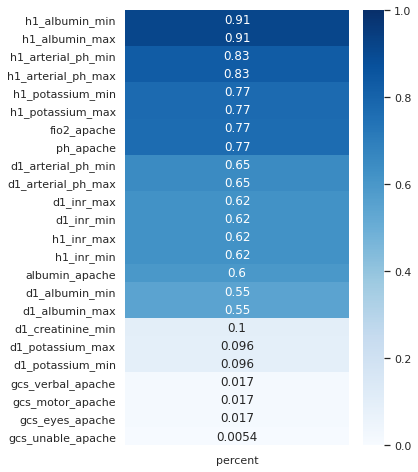

In [16]:
print('We worked with the following '+str(len(df_missing_float)) +' features,'
      ' (note that they have different percentages of missing data):')
df_missing_float


percents = pd.DataFrame(df_missing_float, columns= ['percent'])
plt.figure(figsize = (5,8))
g = sns.heatmap(percents, annot=True, cmap='Blues', yticklabels=df_missing_float['index'].to_numpy(), 
                vmin=0, vmax=1)

## Univariate

Univariate algorithms impute the data only based on non-missing values in that feature dimension. The univariate techniques we explore here are: mean, median, most frequent and constant. For these imputation methods, we adopted the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer">SimpleImputer</a> class from Sklearn.

### Constant

It imputes all the missing values with a predefined value. It can be used in numeric and also categorical variables. In this case, the constant adopted was 0.

In [17]:
# Sort dataframe by percentage of missing data
df_missing_float = df_missing_float.sort_values('percent')

times = []

start_time = time.time()
mean_before, std_before, mean_after, std_after = ul.data_imputation(df[list(df_missing_float['index'])],
                                                                 'constant', 'float')
times.append((time.time() - start_time))

When adopting the constant imputation method, the mean varied more significantly than the data without imputation, as we can see in the plot below. For the percentage of missing close to 0, the mean difference (difference between the two lines) varied just a little. In contrast, for high rates of missing data, below 0.6, the difference is also considerable, in which the mean with constant imputation is smaller than the mean without imputation.

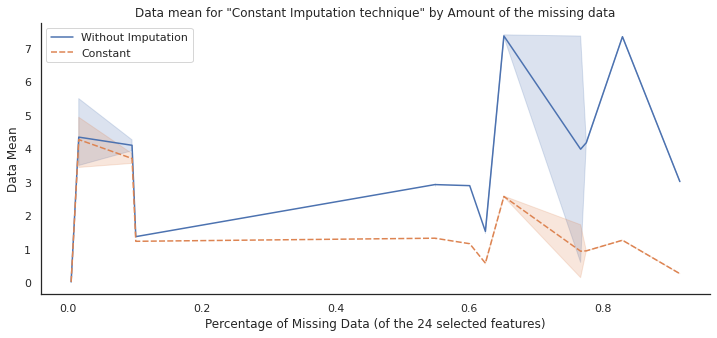

In [18]:
technique = "Constant"

df_mean = ul.join_mean_and_std_series(mean_before, mean_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_mean[['Without Imputation', technique]], title='Data mean for "'+technique+ 
             ' Imputation technique" by Amount of the missing data')
df_means = df_mean

The standard deviation difference between the two sets of data (with and without imputation) also varied. The most significant difference was right after the percentage of 0.6 missing data, in which the standard deviation for the constant imputation technique was around 3.4, while this measure for data without imputation was near 0. In general, de standard deviation for the constant imputation technique is bigger them the original (without imputation).

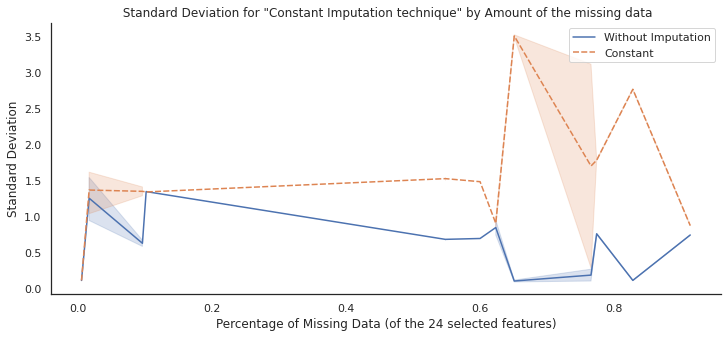

In [19]:
df_std = ul.join_mean_and_std_series(std_before, std_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_std[['Without Imputation', technique]], 
             title=' Standard Deviation for "'+technique+' Imputation technique" by Amount of the missing data',
             ylabel='Standard Deviation')
df_stds = df_std

### Mean

This technique imputes the missing data with the mean of the respective column. It can be applied only in numeric data.

In [20]:
start_time = time.time()
mean_before, std_before, mean_after, std_after = ul.data_imputation(df[list(df_missing_float['index'])],
                                                                    'mean', 'float')
times.append((time.time() - start_time))

Below, we see the plot with the data mean of the features (for the mean imputation technique) by the percentage of missing data. Observe that the mean of the data with and without imputation are very similar. There is almost no difference.

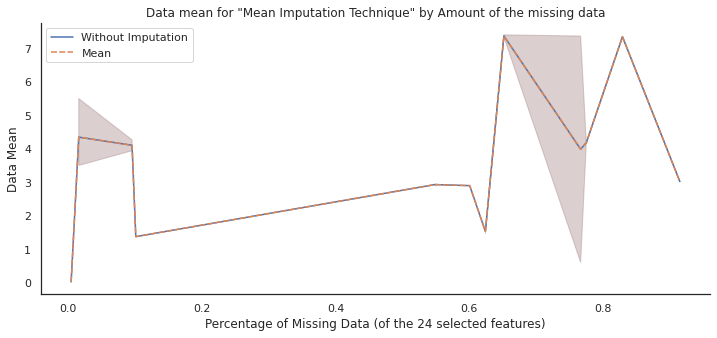

In [21]:
technique = "Mean"


df_mean = ul.join_mean_and_std_series(mean_before, mean_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_mean[['Without Imputation', 'Mean']], title='Data mean for "Mean Imputation Technique" '
             'by Amount of the missing data')
df_means[technique] = df_mean[technique].to_numpy()

The standard deviation of the features with and without imputation is different (distance between the two lines). Observe that the difference in the features with low missis data is very small, almost imperceptible. In turn, when the percentage of missing data is more considerable, the difference between them is also bigger (except in some points). The standard deviation in the data with imputation is small than in the data without mean imputation.

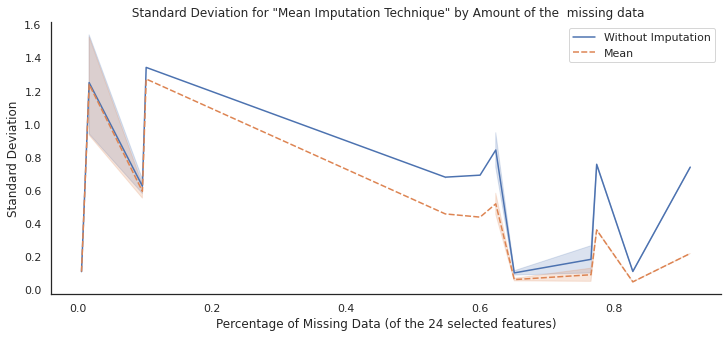

In [22]:
df_std = ul.join_mean_and_std_series(std_before, std_after, df_missing_float, "Without Imputation", "Mean")
ul.line_plot(df_std[['Without Imputation', 'Mean']], 
             title=' Standard Deviation for "Mean Imputation Technique" by Amount of the  missing data',
             ylabel='Standard Deviation')
df_stds[technique] = df_std[technique].to_numpy()

### Median

The median technique considers the median of a feature to impute it in the missing values of this feature. It can be used only in numeric data.

In [23]:
start_time = time.time()
mean_before, std_before, mean_after, std_after = ul.data_imputation(df[list(df_missing_float['index'])],
                                                                 'median', 'float')
times.append((time.time() - start_time))

Again, there is almost no difference in the data mean in the data without imputation and with median imputation technique, as you can see in the plot below.

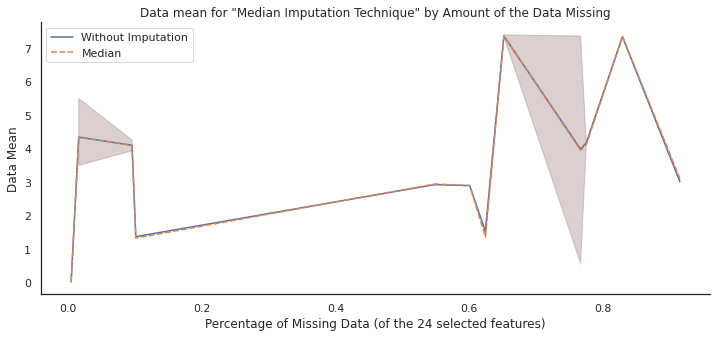

In [24]:
technique = "Median"

df_mean = ul.join_mean_and_std_series(mean_before, mean_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_mean[['Without Imputation', technique]], title='Data mean for "'+technique+
             ' Imputation Technique" by Amount of the Data Missing')

df_means[technique] = df_mean[technique].to_numpy()

In turn, the standard deviation varies. Similar to the mean imputation, here, when the difference of the standard deviations in the two sets of data tends to be bigger when the percentage of missing data is also large, having a different behavior between 0.6 and 0.7.

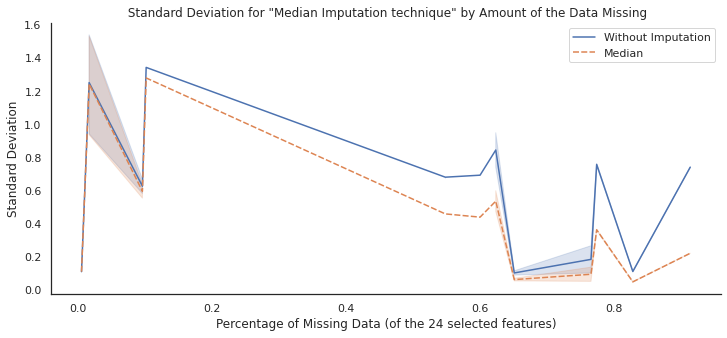

In [25]:
df_std = ul.join_mean_and_std_series(std_before, std_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_std[['Without Imputation', technique]], 
             title=' Standard Deviation for "'+technique+' Imputation technique" by Amount of the Data Missing',
             ylabel='Standard Deviation')

df_stds[technique] = df_std[technique].to_numpy()

### Most Frequent

Most frequent algorithms impute the missing values with the most frequent in the respective column (feature). This technique can also be applied to non-numeric values.

In [26]:
start_time = time.time()
mean_before, std_before, mean_after, std_after = ul.data_imputation(df[list(df_missing_float['index'])],
                                                                 'most_frequent', 'float')
times.append((time.time() - start_time))

The data mean for this technique is very similar to the mean without imputation. The two lines are almost overlapped, except for a few points, but the difference is small (see the plot below). 

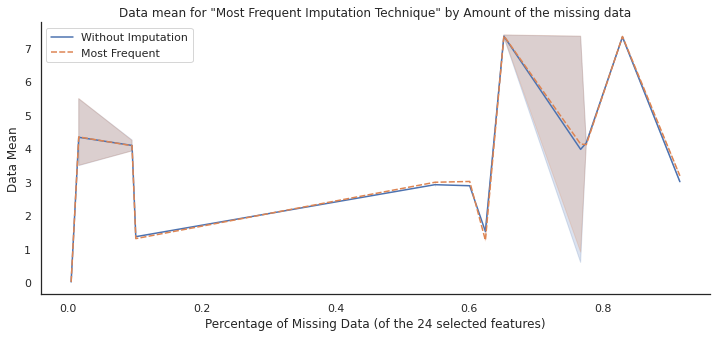

In [27]:
technique = "Most Frequent"

df_mean = ul.join_mean_and_std_series(mean_before, mean_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_mean[['Without Imputation', technique]], title='Data mean for "'+technique+ 
             ' Imputation Technique" by Amount of the missing data')

df_means[technique] = df_mean[technique].to_numpy()

The difference between standard deviation without imputation and with the most frequent technique is minimal when the percentage of missing data is small (e.g., between 0.0 and 0.1) but tends to get big when the missing values are also large.

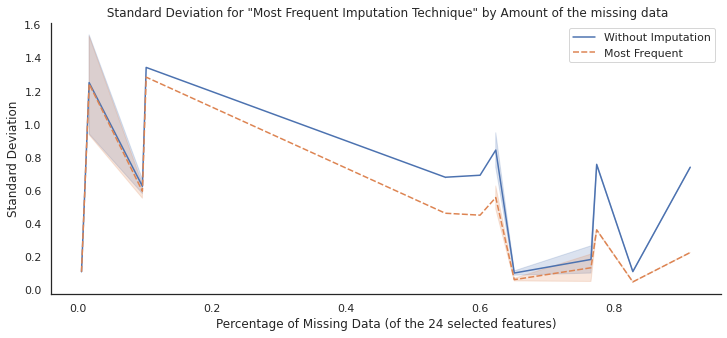

In [28]:
df_std = ul.join_mean_and_std_series(std_before, std_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_std[['Without Imputation', technique]], 
             title=' Standard Deviation for "'+technique+' Imputation Technique" by Amount of the missing data',
             ylabel='Standard Deviation')

df_stds[technique] = df_std[technique].to_numpy()

## Multivariate

Multivariate techniques consider the entire feature dimension to impute the missing values. Here, we explore the k-Nearest neighbors (KNN) and Iterative imputation approaches.

### KNN

The KNN imputation technique provides imputation for filling in missing values using the k-Nearest Neighbors approach. For this imputation, we adopted the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer">KNNImputer</a> class from Sklearn.

In [29]:
start_time = time.time()
mean_before, std_before, mean_after, std_after = ul.data_imputation(df[list(df_missing_float['index'])],
                                                                 'knn', 'float')
times.append((time.time() - start_time))

The plot below shows the data mean for this imputation technique compared to the mean without data imputation for different percentages of missing data. There is almost no difference between the two sets of means.

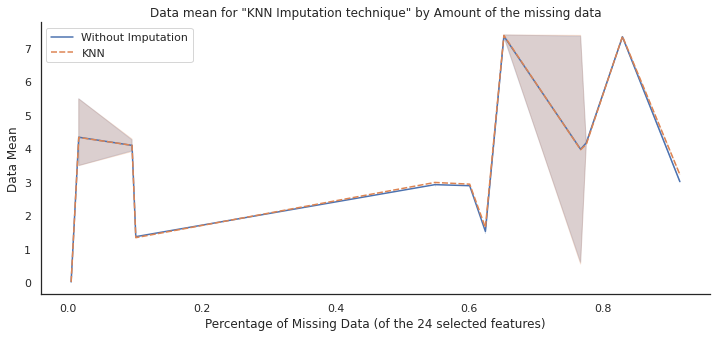

In [30]:
technique = "KNN"

df_mean = ul.join_mean_and_std_series(mean_before, mean_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_mean[['Without Imputation', technique]], title='Data mean for "'+technique+ 
             ' Imputation technique" by Amount of the missing data')

df_means[technique] = df_mean[technique].to_numpy()

Regarding the standard deviation, we can observe no considerable difference between data without and with KNN imputation, even when the percentage of missing data is huge (around 0.8).

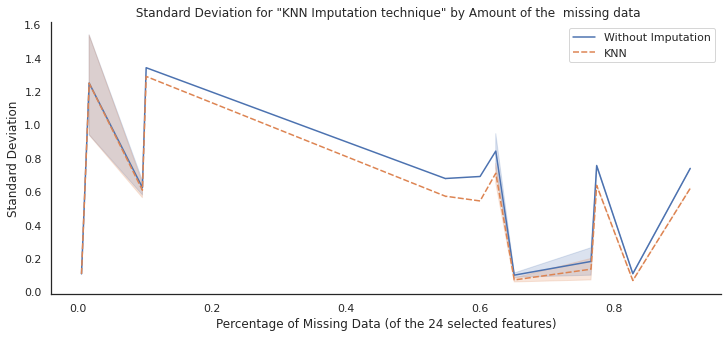

In [31]:
df_std = ul.join_mean_and_std_series(std_before, std_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_std[['Without Imputation', technique]], 
             title=' Standard Deviation for "'+technique+' Imputation technique" by Amount of the  missing data',
             ylabel='Standard Deviation')

df_stds[technique] = df_std[technique].to_numpy()

### Iterative

It models each feature with missing values as a function of other features and uses that estimate for imputation through regression models. For this imputation, we adopted the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer">IterativeImputer</a> class from Sklearn.

In [32]:
start_time = time.time()
mean_before, std_before, mean_after, std_after = ul.data_imputation(df[list(df_missing_float['index'])],
                                                                 'iterative', 'float')
times.append((time.time() - start_time))

Again the mean without and with Iterative imputation by the amount of missing data is similar. The lines are overlapped.

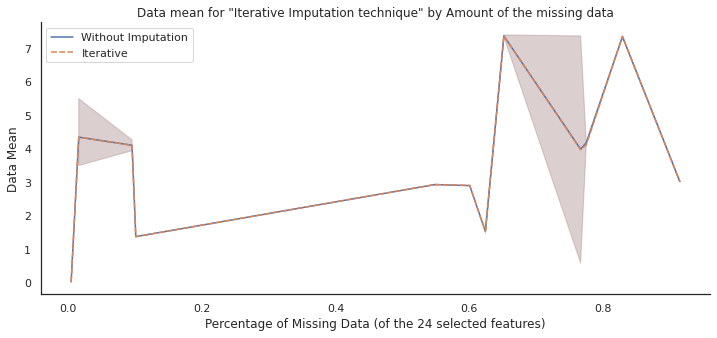

In [33]:
technique = "Iterative"

df_mean = ul.join_mean_and_std_series(mean_before, mean_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_mean[['Without Imputation', technique]], title='Data mean for "'+technique+ 
             ' Imputation technique" by Amount of the missing data')

df_means[technique] = df_mean[technique].to_numpy()

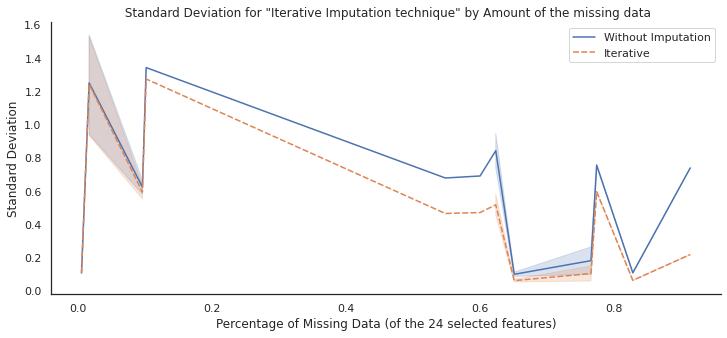

In [34]:
df_std = ul.join_mean_and_std_series(std_before, std_after, df_missing_float, "Without Imputation", technique)
ul.line_plot(df_std[['Without Imputation', technique]], 
             title=' Standard Deviation for "'+technique+' Imputation technique" by Amount of the missing data',
             ylabel='Standard Deviation')

df_stds[technique] = df_std[technique].to_numpy()

## Comparing techniques 

Here, we put it all together to compare the techniques discoursed so far. We compare:
    - The mean and standard deviation (visually, through graphics, and also with statistical tests)
    - The execution time each approach took to perform the imputation
    
Note that almost all imputation technique methods preserve the mean of the original data, except for the "Constant" imputation that has, in general, the smaller mean for all percentages of missing data, as shown in the plots below.

### Mean

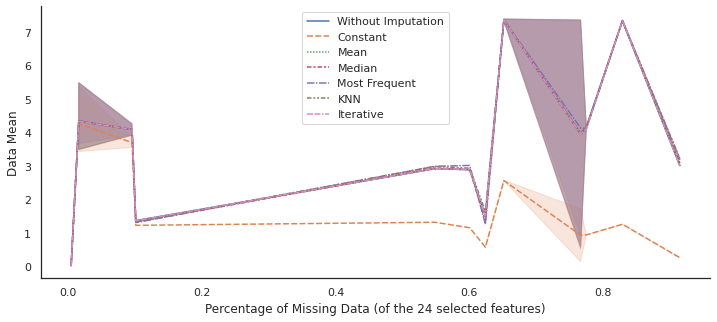

In [35]:
ul.line_plot(df_means)

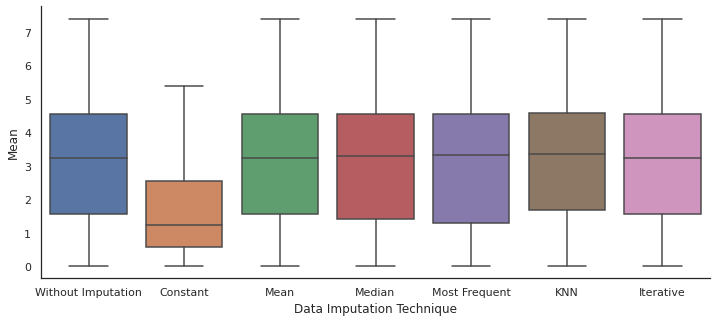

In [36]:
ul.box_plot(df_means)

### Standard Deviation

Regarding the standard deviation, the "Constant" imputation was also the one that has results more distant from the original data. It was the only method that, in general, for all percentages of missing data, the standard deviation has higher values than the data without imputation. The other methods resulted, in general, in a smaller standard deviation of the reference data (without imputation).

The one with more close results to the reference was the KNN imputation, followed by the iterative approach. Mean, Median, and Most Frequent techniques have similar results and came right after the Iterative method. See in the plots below.

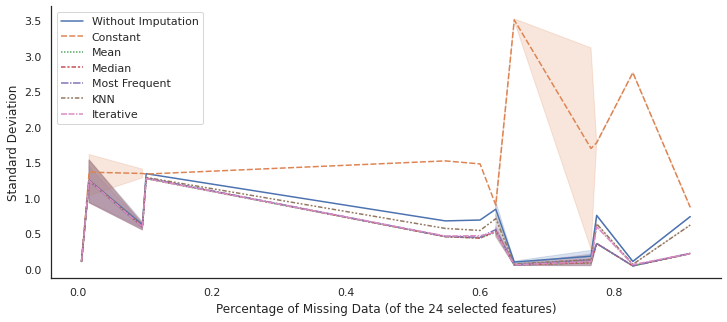

In [37]:
ul.line_plot(df_stds, ylabel='Standard Deviation')

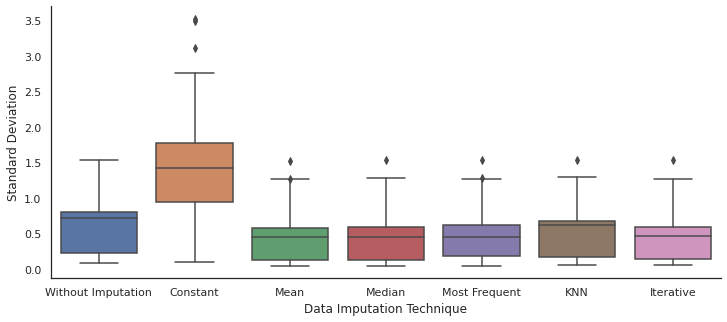

In [38]:
ul.box_plot(df_stds, ylabel='Standard Deviation')

### Data Imputation Execution Time

We also measured the execution time. Observe that the imputation method that better conserved the two analyzed characteristics (mean and standard deviation) was the more costly in runtime. *Any surprise? hahah (everything has a cost)*. 

Coincidentally *(or not)* the worst approach (Constant) was the one with one of the smallest execution time.

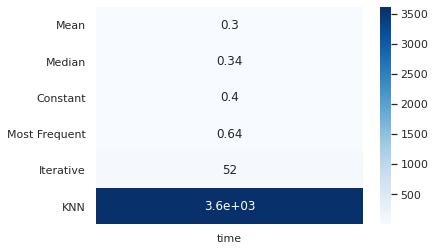

In [39]:
techniques = ['Mean', 'Median', 'Most Frequent', 'Constant','KNN','Iterative']
df_times = pd.DataFrame({'technique': techniques,
                        'time' : times})

df_times = df_times.sort_values('time')

g = sns.heatmap(pd.DataFrame(df_times, columns=['time']), annot=True, cmap='Blues', 
                yticklabels=df_times['technique'].to_numpy())

### Statistical Test

#### Correlation

The plot below shows the correlation between the means of the imputation techniques and the reference (without imputation). Most of them have a very strong correlation, except for "Constant" approach.

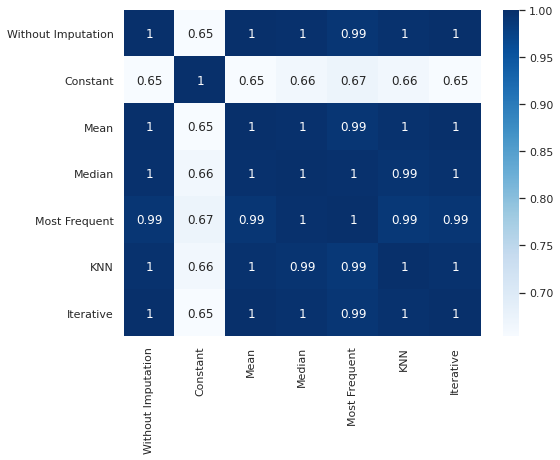

In [40]:
ul.corrlation(df_means)

The correlation of the techniques regarding the standard deviation is shown below. The "Constant" imputation has a negative correlation with all techniques, including with the original data. Mean, Median and Most Frequent have similar values, representing a strong correlation with "Without Imputation". In turn, Iterative and KNN have the biggest correlation with the reference data (without imputation).

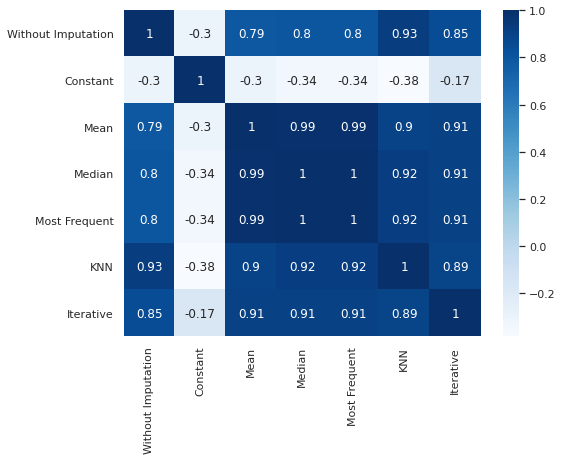

In [41]:
ul.corrlation(df_stds)

#### Kruskal-Wallis 

Kruskal-Wallis tests whether the distributions of two or more independent samples are equal or not. We compared the samples (mean and standard deviation) for all imputation techiniques and original data.

Firstly we performed the test in all data. Note that the results were "probably different distributions" for both tests, in the samples of "Mean" and "Standard Deviation". 

In [42]:
ul.wallis(df_means, df_name="Mean", include_constant=True)
ul.wallis(df_stds, df_name="Standard Deviation", include_constant=True)

Mean
p=0.002
probably different distributions

Standard Deviation
p=0.000
probably different distributions



When removing the data of the technique, the experiments revealed to be the ones that less preserved the original characteristics, "Constant" imputation, we see something different. Now, the statistical test affirmed that "probably the same distribution" for both.

In [43]:
ul.wallis(df_means, df_name="Mean", include_constant=False)
ul.wallis(df_stds, df_name="Standard Deviation", include_constant=False)

Mean
p=0.999
probably the same distribution

Standard Deviation
p=0.065
probably the same distribution



## Other methods

Other imputation methods that can be explored are "Mode" and "MICE". The "Moda" technique is similar to the "Mean" and "Median" approaches. The difference is that here, the missing data are filled with the mode of the respective column.

MICE (Multivariate Imputation by Chained Equations) was proposed by  <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1002/mpr.329">Azur, Melissa J., et al (2002).</a>. MICE imputes de missing data based on a serie of linear regression models. 

*Just a curiosity: the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer">IterativeImputer</a>  implementation is based on the R MICE package <a href="https://scikit-learn.org/stable/modules/impute.html#id3">[REF].</a>*

# Remarks


We explored some data imputation techniques, analyzing their impact on the data mean and standard deviation when applying each one of them. We also compared the techniques performing some statistical tests and also in terms of execution time. The "Constant" imputation method had the biggest impact in the mean and in the standard deviation (compared to these measures in the data without imputation) and had the shorter execution time. The other approaches (Mean, Median, Constant, Most Frequent, Iterative and KNN) had a similar impact on the mean. Finally, the KNN imputation had the best performance of all in terms of standard deviation (had the lowest impact) compared to the reference data (without imputation), but had the highest runtime.


We have reached the end of our adventure. If you are still here with me, thank you so much! I hope this material could help you. See you around!! :D

# Further Reading
- https://scikit-learn.org/stable/modules/impute.html
- https://www.socscistatistics.com/
- https://onlinelibrary.wiley.com/doi/epdf/10.1002/mpr.329
- https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8502041
- https://arxiv.org/pdf/0812.1539.pdf

In [44]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostrar/Esconder Código."></form>''')

In [45]:
HTML('''<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Criado por Chaina Oliveira
</footer>''')